In [7]:
################# Imports #######################################
import pandas_datareader as pdr     #allows to create dataframe from internet data source
import pandas as pd   #allows to import data from files
import matplotlib.pyplot as plt   #helps to plot the data
import numpy as np   #help to create multi dimension array
from numpy import array
from sklearn.preprocessing import MinMaxScaler  #provides a selection of efficient tools for machine learning and statistical modeling
from tensorflow.keras.models import Sequential   #to train data
from tensorflow.keras.layers import Dense  #keras used to evaluate deep learning data
from tensorflow.keras.layers import LSTM
import tensorflow as fr
import math
from sklearn.metrics import mean_squared_error
#from google.colab import files

################# To Collect Data Of A Stock #################### 
#df = pdr.get_data_tingo('',api_key = 'f18647627f0a8629c5de70bc99a7f33de70deb7f')
#df.to_csv('AAPL.csv')


################# To Insert Data ############################
#uploaded=files.upload()
df = pd.read_csv('TCS.csv')
##de = df.tail()
##print(de)
df1= df.reset_index()['Close']#[by doing reset index cloase column values will be taken]
##print(df1)


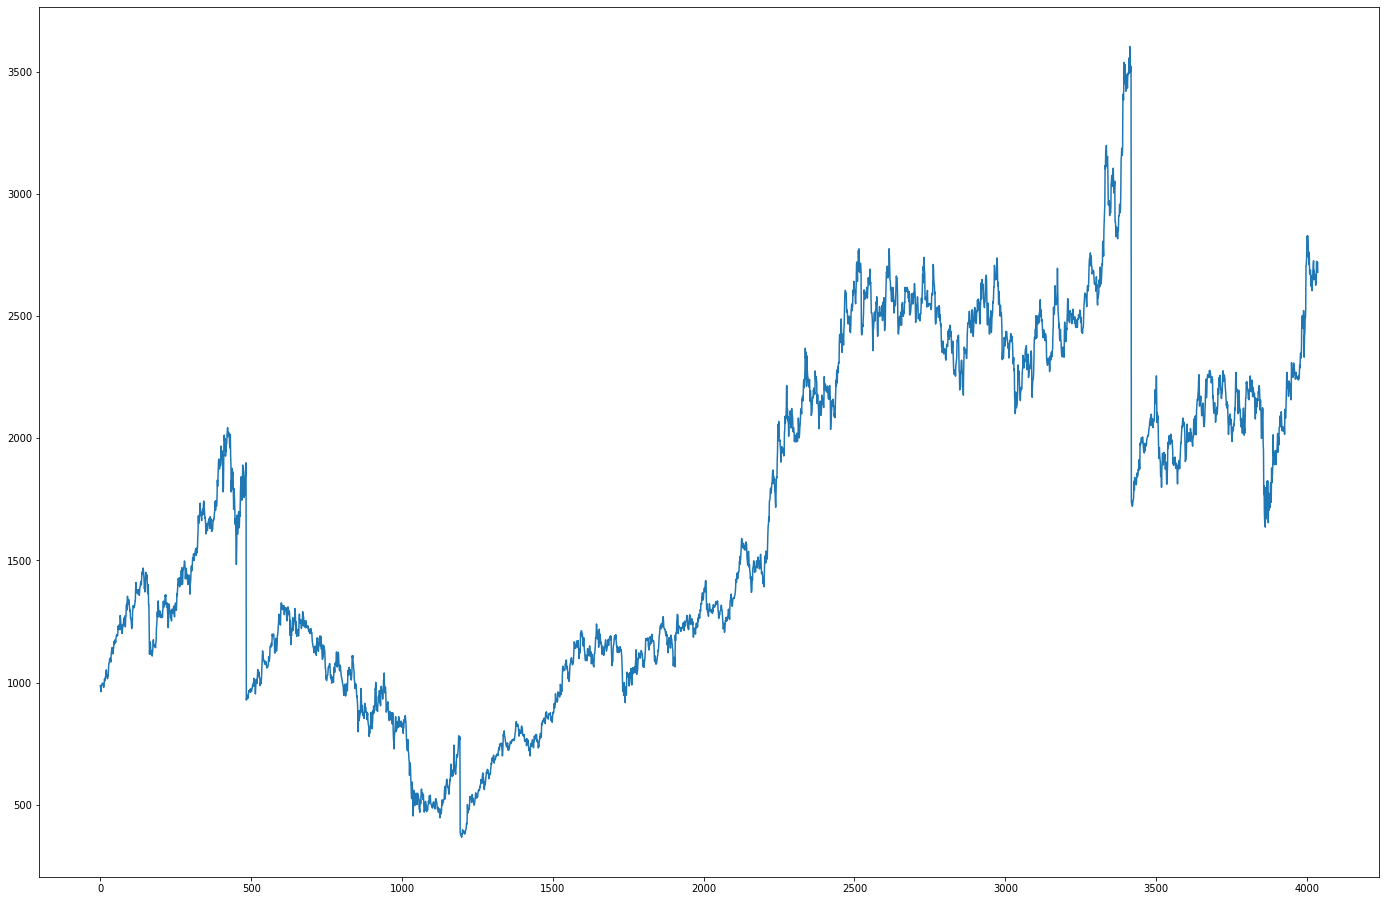

In [8]:


################ To Plot Data ####################
plt.figure(figsize=(24,16))
plt.plot(df1)
##plt.show()

################ Long Term Short Memory With Help Of MinMax Scaler #####################
#LSTM is very sensitive to the scale of data.
scaler = MinMaxScaler(feature_range=(0,1))#min max scaler will transform vallue from 0to 1
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) 
df1.shape
##print(df1.shape)

############### Dividing Data Set In Training And Test Set ##########################3
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
#print(training_size,test_size)




In [11]:
############# Conversion Of Array Values To Dataset Matrix #################
def create_dataset(dataset,time_step=1):  #time step by default put to 1
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   ###i=0,  0,1,2,3_______,99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)


############# Reshape into X=t,t+1,t+2,t+3 and Y=t+4############
time_step = 100 
X_train ,Y_train=create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)
print(X_train.shape)
print(Y_train.shape)

(2523, 100)
(2523,)


In [12]:
############ Reshape Input to be ########################
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)#reason is to give last 2 to the LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

########### Creating Stacked LSTM Model #################
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))#(100,1) is X_train.shape[1][2]
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50)) #stacked LSTM so taking 3 times
model.add(Dense(1))#output
model.compile(loss='mean_squared_error',optimizer='adam')#compiling with mean_square_error

model.summary()

##print(X_train[:100])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)


NameError: name 'model' is not defined

In [53]:

############### Do Predicton And Check Performance Metrices ######################
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

############## Calculate RMSE(root mean square) Performance Metrices #########33
math.sqrt(mean_squared_error(Y_train,train_predict))#output for train dataset



1401.6256814127105

In [54]:
math.sqrt(mean_squared_error(Y_test,test_predict))#output for test dataset

2365.577834858832

In [55]:
len(test_data)

1413

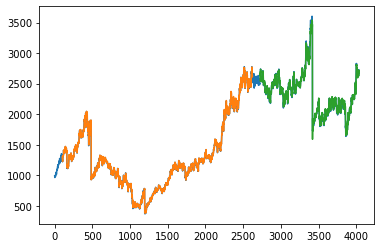

In [56]:


############## Plotting ############33
look_back= 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)
plt.show()




x_input = test_data[1313:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input = temp_input[0].tolist()



In [57]:

############### Prediction For Next 30 Days ######################
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps , 1))
        yhat = model.predict(x_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input= temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

day_new = np.arange(1,101)
day_pred=np.arange(101,131)
df3 = df1.tolist()
df3.extend(lst_output)

61214686
 0.60579849 0.60687972 0.62014797 0.65638467 0.65638467 0.65996818
 0.64697796 0.64356436 0.64832177 0.6661312  0.64898596 0.60721954
 0.63503807 0.63627377 0.6554579  0.6566627  0.66628566 0.72261782
 0.72524366 0.73193185 0.75965771 0.75571894 0.76098608 0.7599203
 0.75468405 0.73336834 0.7403809  0.72439412 0.73287407 0.71322655
 0.71191363 0.71674827 0.71718077 0.69924777 0.69679183 0.70002008
 0.70996741 0.69135478 0.70031356 0.70635301 0.71640846 0.72312754
 0.72904342 0.70525633 0.7170572  0.71188273 0.70749602 0.71166649
 0.71033812 0.69816654 0.701333   0.70854636 0.72831745 0.72763782
 0.72122766 0.72718988 0.71453947 0.71304482 0.71312636 0.71380711
 0.71368462 0.71290642 0.71189636 0.71093649 0.71010631 0.70938122
 0.70872045 0.70810151 0.70751983 0.70697832]
13 day output [[0.7064791]]
14 day input [0.59092383 0.59151079 0.58309263 0.58171792 0.58474537 0.59975904
 0.59582027 0.59194328 0.5910474  0.58408119 0.58318531 0.57938555
 0.58286094 0.58791183 0.58384949 

In [58]:
import matplotlib.pyplot as plt
len(df1)

4037

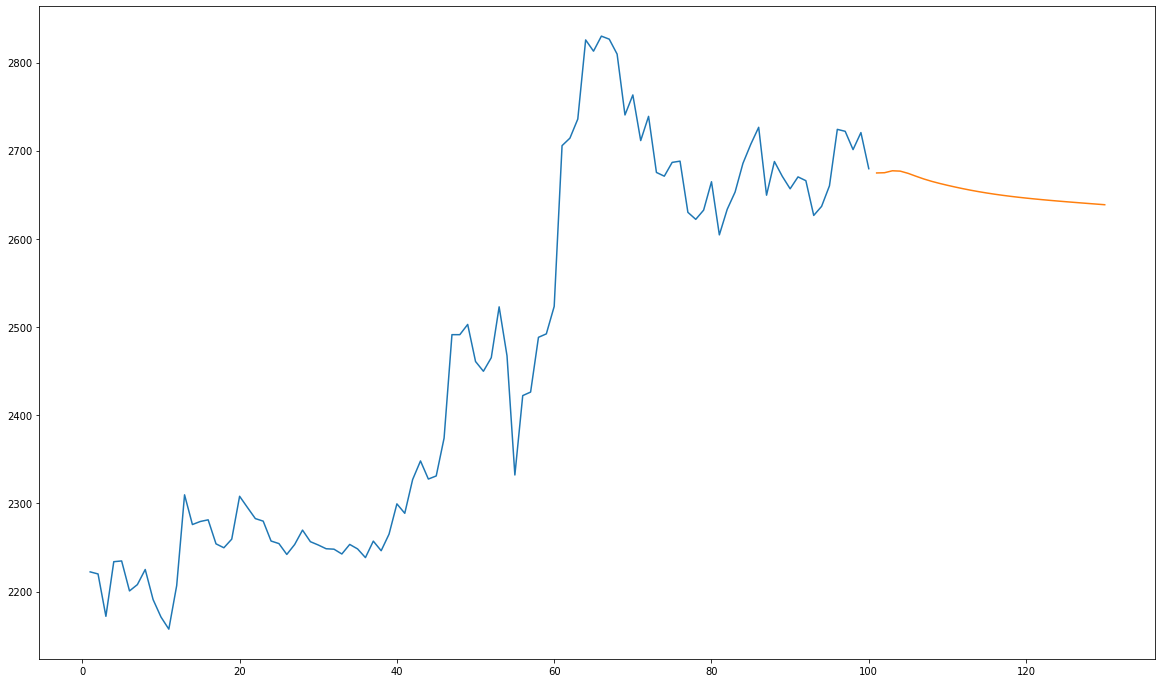

In [59]:
plt.figure(figsize=(20,12))
plt.plot(day_new,scaler.inverse_transform(df1[3937:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

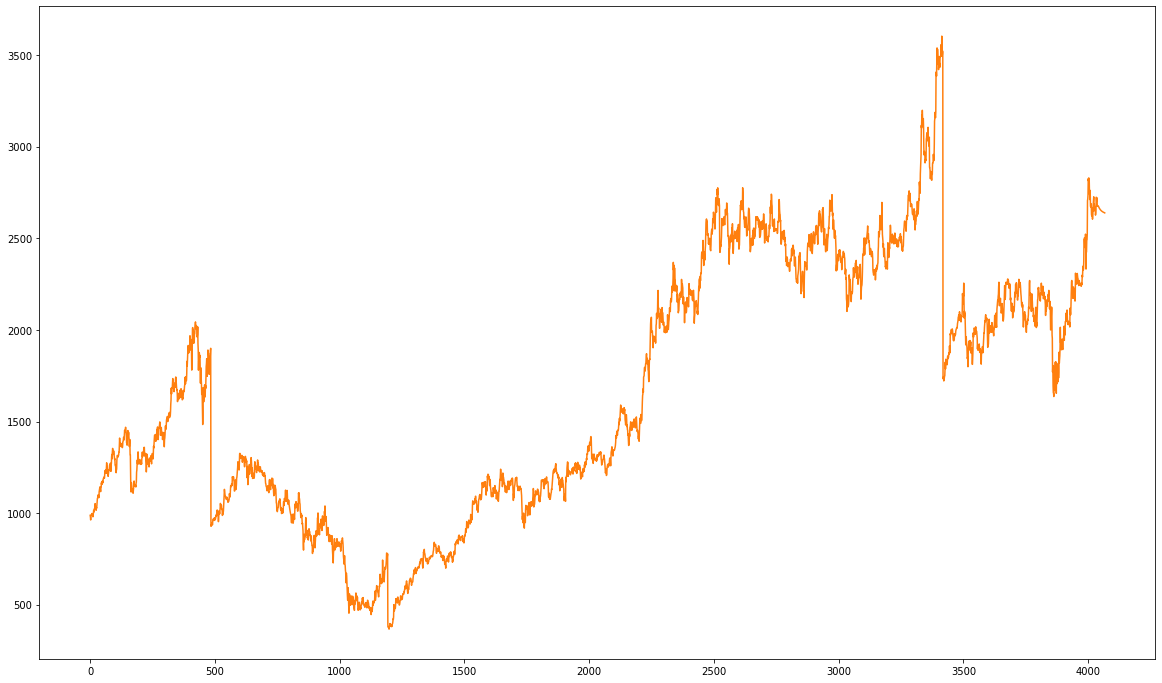

In [60]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(20,12))
plt.plot(df3[4100:])
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)